# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Create a path 
path = r'/Users/alejandrosalgado/Desktop/Final Project'

In [3]:
df = pd.read_csv(r'/Users/alejandrosalgado/Desktop/Final Project/real_estate.csv', index_col = False)

In [8]:
matplotlib.__version__

'3.5.1'

# Cleaning Data 

In [9]:
df.shape

(414, 8)

In [10]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [11]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
# Check for missing values

df.isnull().sum() # No missing values!

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [13]:
# Find duplicates

df_dups = df[df.duplicated()]

In [14]:
df_dups.shape # No duplicates!

(0, 8)

In [15]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

In [16]:
# Create a correlation matrix using pandas

df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [17]:
# Rename columns whose names are too long

df.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 
                     'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops',
                     'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' },
                      inplace = True)

In [18]:
df.head()

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [19]:
df.corr()

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
Date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
House age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
D. metro,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
N. shops,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price per unit,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


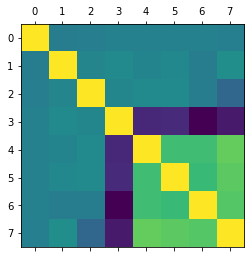

In [20]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

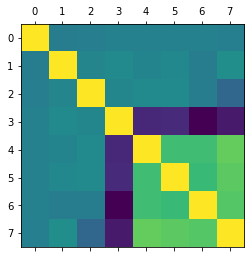

In [21]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [22]:
#current dir
cwd = os.getcwd()
cwd

'/Users/alejandrosalgado/Desktop/Final Project/03 Scripts '

Text(0.5, 1.0, 'Correlation Matrix')

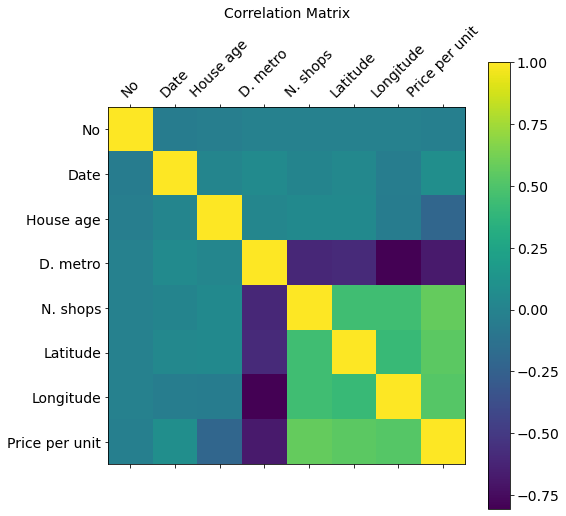

In [23]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [24]:
df.columns 

Index(['No', 'Date', 'House age', 'D. metro', 'N. shops', 'Latitude',
       'Longitude', 'Price per unit'],
      dtype='object')

In [25]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['House age', 'D. metro', 'N. shops', 'Latitude','Longitude', 'Price per unit']]

In [26]:
sub

,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


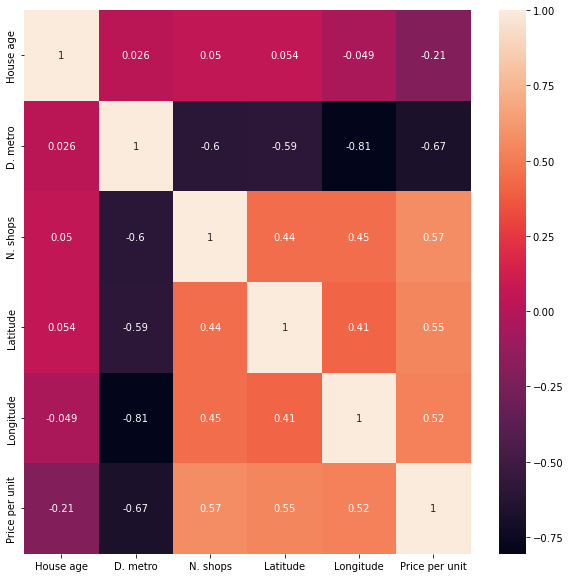

In [27]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

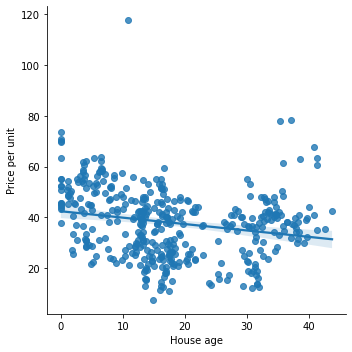

In [28]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'House age', y = 'Price per unit', data = df)

In [29]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['House age', 'D. metro', 'N. shops', 'Price per unit']]

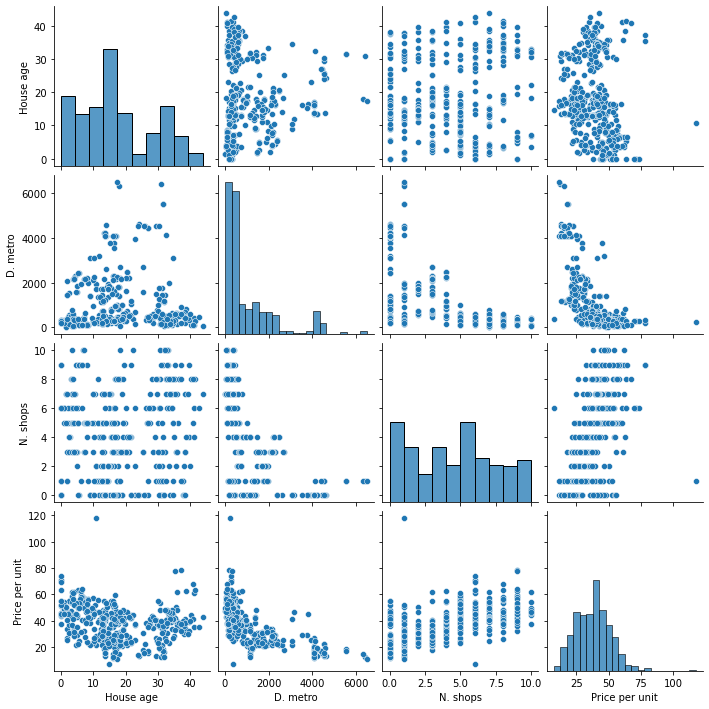

In [30]:
# Create a pair plot 

g = sns.pairplot(sub_2)

<AxesSubplot:xlabel='Price per unit', ylabel='Count'>

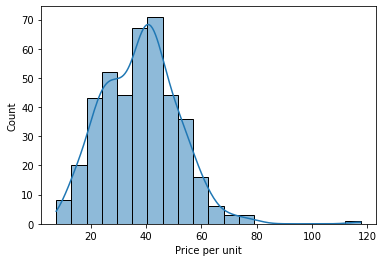

In [31]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Price per unit'], bins = 20, kde = True)

In [32]:
df.loc[df['Price per unit'] < 20, 'Price category'] = 'Low price'

In [33]:
df.loc[(df['Price per unit'] >= 20) & (df['Price per unit'] < 50), 'Price category'] = 'Middle price'

In [34]:
df.loc[df['Price per unit'] >= 50, 'Price category'] = 'High price'

In [35]:
df['Price category'].value_counts(dropna = False)

Middle price    305
High price       74
Low price        35
Name: Price category, dtype: int64

In [36]:
df.columns

Index(['No', 'Date', 'House age', 'D. metro', 'N. shops', 'Latitude',
       'Longitude', 'Price per unit', 'Price category'],
      dtype='object')

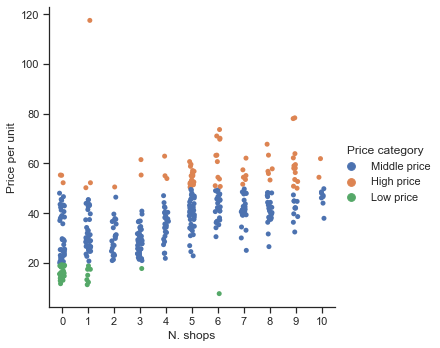

In [37]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="N. shops", y="Price per unit", hue="Price category", data=df)